In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
import os
import matplotlib.pyplot as plt
import numpy as np

In [36]:
#Importing the dataset as a generator
train = ImageDataGenerator(zoom_range=[0.8,0.8]).flow_from_directory(directory=os.path.join(os.getcwd(),'data/train'),
                          target_size=(224,224),
                          classes=['affected','normal'],
                          batch_size=5
                          )

Found 85 images belonging to 2 classes.


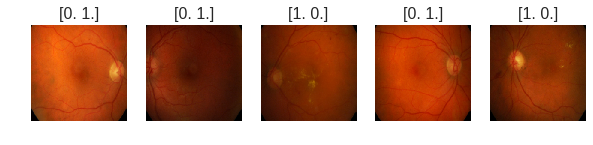

In [47]:
#Visualizing the dataset(optional)
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i + 1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],interpolation=None if interp else 'none')

imgs, labels = next(train)
plots(imgs, titles=labels)
#[1,0] - affected, [0,1] - normal

In [0]:
#Importing pretrained VGG16,with Imagenet weights
from keras.applications.vgg16 import VGG16

vgg16 = VGG16()

model = Sequential()

In [0]:
#Converting VGG16 into Sequential model
for layer in vgg16.layers[:-1]:
    model.add(layer)

#Freezing all layers except last layer for transfer learning
for layer in model.layers:
    layer.trainable = False

In [0]:
#Adding custom softmax layer
model.add(Dense(2,activation='softmax'))

In [109]:
#Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [110]:
#Compiling our model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting our model
model.fit_generator(train,epochs=10,steps_per_epoch=17,verbose=1)

Epoch 1/10
17/17 [==============================] - 5s 316ms/step - loss: 0.7636 - acc: 0.6706
Epoch 2/10
17/17 [==============================] - 5s 306ms/step - loss: 0.3240 - acc: 0.7765
Epoch 3/10
17/17 [==============================] - 5s 315ms/step - loss: 0.2243 - acc: 0.9294
Epoch 4/10
17/17 [==============================] - 5s 317ms/step - loss: 0.1345 - acc: 0.9529
Epoch 5/10
17/17 [==============================] - 5s 315ms/step - loss: 0.0873 - acc: 0.9765
Epoch 6/10
17/17 [==============================] - 5s 315ms/step - loss: 0.0898 - acc: 0.9647
Epoch 7/10
17/17 [==============================] - 5s 314ms/step - loss: 0.0668 - acc: 0.9882
Epoch 8/10
17/17 [==============================] - 5s 314ms/step - loss: 0.0788 - acc: 0.9765
Epoch 9/10
17/17 [==============================] - 5s 313ms/step - loss: 0.0714 - acc: 0.9882
Epoch 10/10
17/17 [==============================] - 5s 309ms/step - loss: 0.0320 - acc: 1.0000


In [0]:
#Saving the model
model.save('detector.h5')

In [0]:
#Evaluating model
score = model.evaluate_generator(train,steps=17)
print(score)